In [2]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt

### Подготовка данных

In [7]:
genes = ['gene' + str(i) for i in range(1, 101)]
#признаки генов
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index = genes)

In [10]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)

In [11]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,124,124,125,121,120,709,746,784,754,761
gene2,128,140,154,137,134,283,290,303,303,334
gene3,919,970,954,978,989,47,51,49,42,33
gene4,171,155,138,151,189,813,793,846,817,887
gene5,643,615,591,611,650,195,207,190,179,188


In [12]:
scaled_data = preprocessing.scale(data.T)

### Алгоритм

In [15]:
pca = PCA()

In [17]:
pca.fit(scaled_data)

PCA()

In [18]:
pca_data = pca.transform(scaled_data)

In [19]:
scaled_data.shape

(10, 100)

In [20]:
pca_data.shape

(10, 10)

In [22]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PS' + str(x) for x in range(1, len(per_var) + 1)]

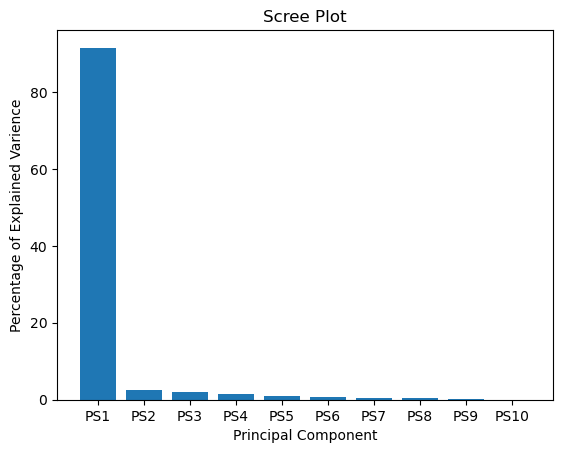

In [24]:
plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Varience')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
#это график информативности компонент